<a href="https://colab.research.google.com/github/AS-XS/551a2/blob/main/Comp551_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Task 1

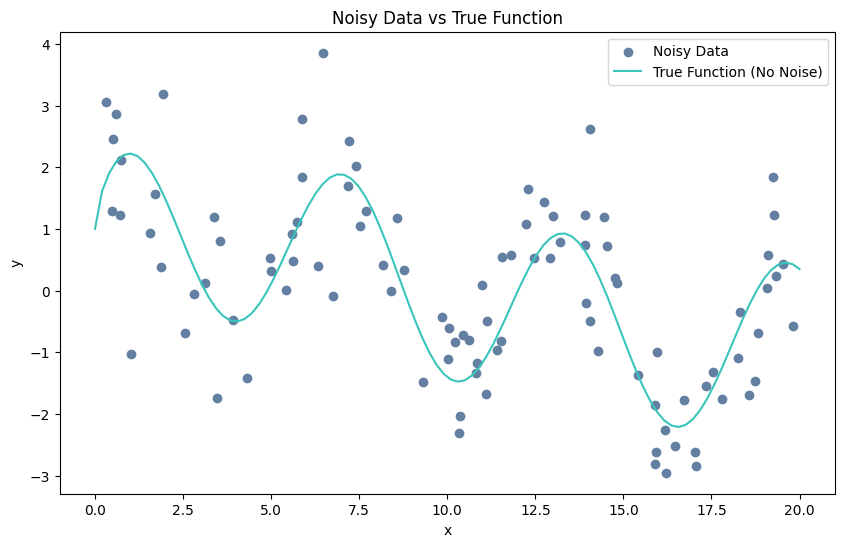

In [145]:
# Step 1: Generate data
#np.random.seed(42)  # For reproducibility
x = np.random.uniform(0, 20, 100)
x = np.sort(x)

epsilon = np.random.normal(0, 1, size=x.shape)
y = np.sin(np.sqrt(x)) + np.cos(x) + np.sin(x) + epsilon

x1 = np.linspace(0, 20, 100)
y1 = np.sin(np.sqrt(x1)) + np.cos(x1) + np.sin(x1)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color = "#6380A2", label='Noisy Data')
plt.plot(x1, y1, color = "#39C5BB", label='True Function (No Noise)')
plt.title('Noisy Data vs True Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

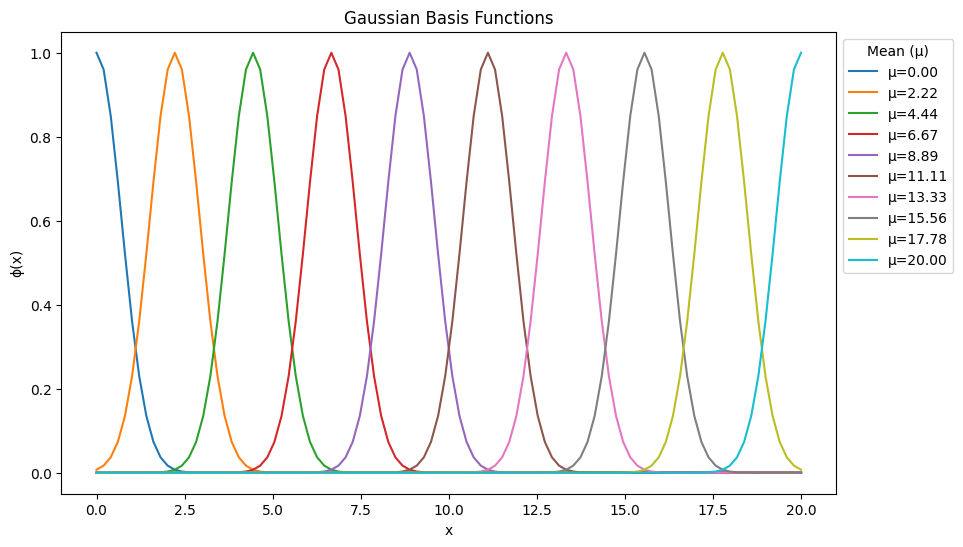

In [155]:
# Step 2: Non-Linear Basis Functions
def gaussian(x, mu, sigma = 1):
    return np.exp(-(x - mu)**2 / sigma**2)

# Plot Gaussian basis functions for different means
mu_values = np.linspace(0, 20, 10)

plt.figure(figsize=(10, 6))
for mu in mu_values:
    plt.plot(x1, gaussian(x1, mu), label=f'μ={mu:.2f}')
plt.title('Gaussian Basis Functions')
plt.xlabel('x')
plt.ylabel('ϕ(x)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Mean (μ)', frameon=True)
plt.show()

In [147]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        self.w = np.linalg.lstsq(x, y, rcond=None)[0]          #return w for the least square difference
        return self

    def predict(self, x):
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

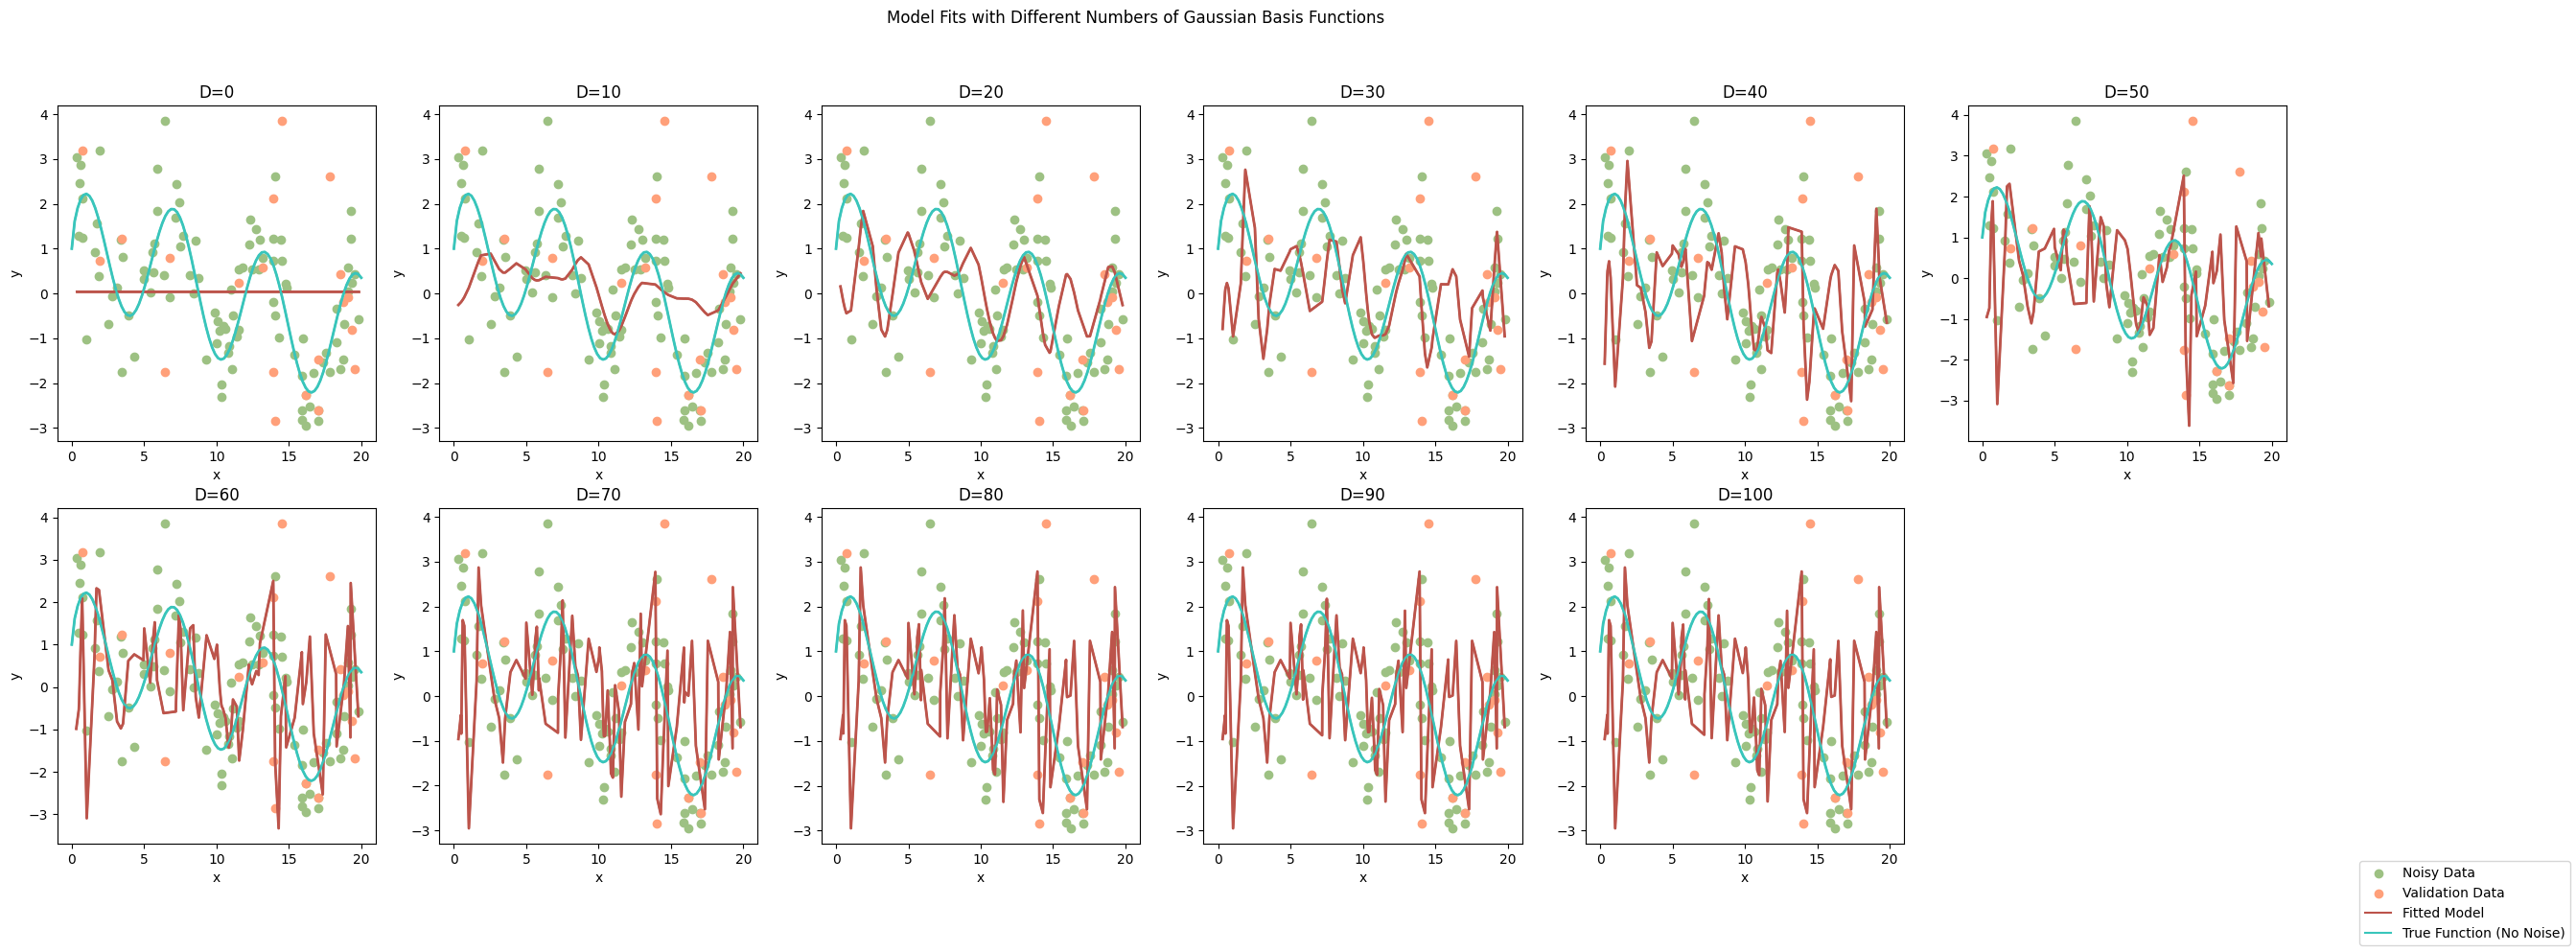

In [151]:
# Step 3: Fit models with different numbers of Gaussian bases

def create_design_matrix(x, D, sigma=1):
    mu_values = np.linspace(0, 20, D)
    phi = np.column_stack([gaussian(x, mu) for mu in mu_values])
    return phi

D_values = list(np.arange(0, 101, 10))

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2) # Can change to train_test_split(x, y, test_size=0.2, random_state=42) for reproducibility

x_train = np.sort(x_train)
x_val = np.sort(x_val)

# Prepare the handles and labels for the main legend
legend_handles = []
legend_labels = []

# Prepare to track SSE values for training and validation sets
sse_train = []
sse_val = []

fig, axes = plt.subplots(2,6,figsize=(30,10))
axes = axes.flatten()
fig.suptitle('Model Fits with Different Numbers of Gaussian Basis Functions')


# Iterate over different numbers of basis functions (D)
for i,D in enumerate(D_values):
    if D == 0:
        x_transformed_train = np.ones((len(x_train), 1))
        x_transformed_val = np.ones((len(x_val), 1))
    else:
        x_transformed_train = create_design_matrix(x_train, D)
        x_transformed_val = create_design_matrix(x_val, D)

    # Fit the linear regression model using your LinearRegression class
    model = LinearRegression(add_bias=False)
    model.fit(x_transformed_train, y_train)

    # Predict the values using the fitted model
    yh_train = model.predict(x_transformed_train)
    yh_val = model.predict(x_transformed_val)

    # Calculate Sum of Squared Errors (SSE)
    sse_train.append(np.sum((y_train - yh_train) ** 2))
    sse_val.append(np.sum((y_val - yh_val) ** 2))

    # Plot the fitted model on the corresponding subplot
    axes[i].scatter(x, y, color="#9DC183", label='Noisy Data')
    axes[i].scatter(x_val, y_val, color="#FFA07A", label='Validation Data')
    axes[i].plot(x_train, yh_train, label=f'Fitted Model (D={D})', linewidth=2, color='#BC544B')
    axes[i].plot(x1, y1, color="#39C5BB", label='True Function (No Noise)', linewidth=2)
    line_fit, = axes[i].plot(x_train, yh_train, label=f'Fitted Model (D={D})', color='#BC544B')
    axes[i].plot(x1, y1, color="#39C5BB", label='True Function (No Noise)')
    axes[i].set_title(f'D={D}')
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')

    # Collect handles and labels for the main legend only once
if not legend_handles:  # Only add if it's empty (i.e., first time)
    legend_handles.append(axes[0].collections[0])  # Noisy Data
    legend_handles.append(axes[0].collections[1])  # Validation Data
    legend_handles.append(line_fit)  # Last fitted model line (one of them)
    legend_handles.append(axes[0].lines[-1])  # True function line
    legend_labels.extend(['Noisy Data', 'Validation Data', 'Fitted Model', 'True Function (No Noise)'])

# Add a single legend for all subplots, placed at the top
fig.legend(handles=legend_handles, labels=legend_labels, loc='lower right')



axes[-1].set_visible(False)
plt.show()

In [152]:
# Step 4: Choose Optimal Model
# Print SSE for training and validation sets
print("Sum of Squared Errors (SSE):")
print("D\tSSE Train\tSSE Validation")
for D, sse_t, sse_v in zip(D_values, sse_train, sse_val):
    print(f"{D}\t{sse_t:.4f} \t{sse_v:.4f}")

# Identify the optimal number of Gaussian bases
optimal_index = np.argmin(sse_val)
optimal_D = D_values[optimal_index]
print(f"\nOptimal number of Gaussian bases: D={optimal_D} with SSE={sse_val[optimal_index]:.4f}")

Sum of Squared Errors (SSE):
D	SSE Train	SSE Validation
0	151.8217 	71.5619
10	135.4030 	74.9982
20	112.0278 	92.1836
30	96.3562 	98.4147
40	72.8265 	136.1989
50	47.4419 	585.5988
60	39.4658 	30612.8079
70	23.5036 	279350702.9128
80	23.2400 	90848710.1283
90	23.3312 	107097968.0753
100	23.3734 	116696742.3473

Optimal number of Gaussian bases: D=0 with SSE=71.5619


## Task 2